# ***1.Import necessary libraries***

In [1]:
from preset_mdl import preset_mdl
from preset_pr import preset_pr
from signal_source import signal_source
from RISCA_core import RISCA_core
from analyser.analyser import AnalyserSar
import pandas as pd

# ***2.Initialize Objects and Pass Configuration Information***

In [2]:
# %matplotlib inline
# %pip install jinja2
mdl = preset_mdl()
pr = preset_pr()
pr['conf_name'] = input('配置文件名: sar/tisar/nssar1o1c/noisar1o1ccp/pipesar2s/...')
cfg_info = pd.DataFrame(pr["T_assembler"])
styled_df = cfg_info.style\
            .set_table_attributes('class="dataframe table table-striped"')\
            .set_properties(**{'text-align': 'center'})\
            .set_caption(f'Configuration Information for {pr["conf_name"]}')
styled_df

Loading file: ..\config\sar\timing_table.xlsx
[util.load_assembler_xlsx] TI parameter loaded: pr["TI"]= 1
Loaded Excel configuration:


,frame1,frame2,frame3
Item,,,
CB1,OUT RST SAM1,MSB,LSB


# ***3.Input signal & Analysis conversion results***

In [3]:
# 定义输入信号峰值
v_in_peak = [0.85, 0]
# 调用 signal_source 函数
v_in_p, v_in_n = signal_source(pr, mdl, v_in_peak)

# Instantiate the device under test
da = RISCA_core(mdl, pr, v_in_p, v_in_n)

# ***4.Run Analysis***

offset_nocal = -8.98 LSB


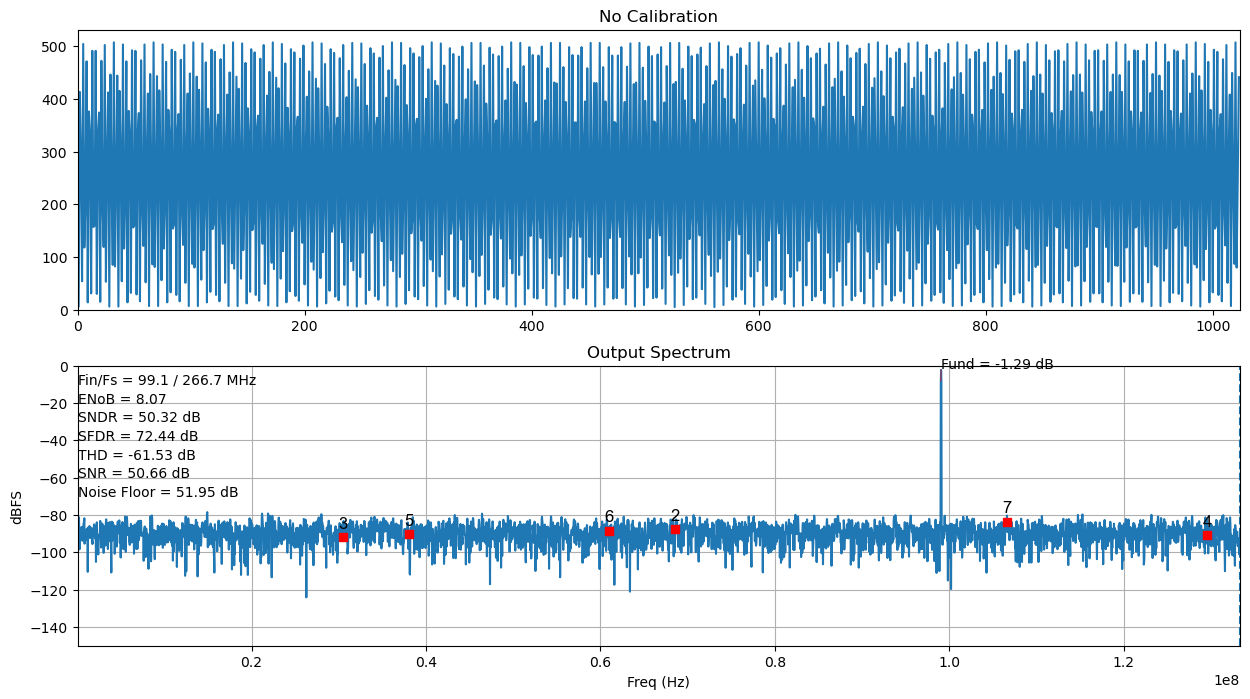

In [4]:
test = AnalyserSar(da, pr)
test.no_calibration()